# Espacios de similitud de vectores

Vamos a comparar los embeddings vectoriales de diferentes modelos. Utilizaremos los siguientes:

- Word2Vec, entrenado en el set de datos de Google News
- OpenAI text-embedding-ada002
- OpenAI text-embedding-3-small


In [ ]:
# Cargar vectores de OpenAI y Google News
import json

with open('embeddings/sustantivos_word2vec.json') as f:
    vectors_w2vec = json.load(f)
    
with open('embeddings/sustantivos_text-embedding-ada-002.json') as f:
    vectors_ada2 = json.load(f)

with open('embeddings/sustantivos_text-embedding-3-small-1536.json') as f:
    vectors_emb3 = json.load(f)

vectors_w2vec["avena"]

[-0.002178868278861046,
 -0.0008391509763896465,
 0.008000130765140057,
 -0.0004639449471142143,
 0.0010899524204432964,
 0.0007706288597546518,
 0.004508971702307463,
 0.006039018277078867,
 0.009743423201143742,
 -0.007507654372602701,
 -0.003747343085706234,
 -0.0008105275337584317,
 0.009422282688319683,
 0.008716851472854614,
 8.422654354944825e-05,
 0.003215976059436798,
 0.008213716559112072,
 0.00011946893209824339,
 0.009049135260283947,
 -0.0016271290369331837,
 -0.005576555151492357,
 -0.0068673244677484035,
 -0.00031760925776325166,
 -0.007049249485135078,
 -0.005953855346888304,
 0.006861452013254166,
 -0.009716994129121304,
 0.003782302374020219,
 -0.006114931311458349,
 0.005385015159845352,
 0.005893699359148741,
 0.006967428606003523,
 0.007240247447043657,
 0.0025028588715940714,
 0.000144512188853696,
 -0.0012325567658990622,
 -0.003118023509159684,
 -0.0030026438180357218,
 0.0011841891100630164,
 0.007948627695441246,
 -0.0039100609719753265,
 -0.00410872558131814,

In [4]:
vectors_emb3["avena"]

[0.019316399469971657,
 -0.04598496854305267,
 0.014012528583407402,
 0.017254536971449852,
 -0.01580309309065342,
 -0.012337264604866505,
 0.02786227874457836,
 0.02419975958764553,
 0.02014385722577572,
 0.019845429807901382,
 -0.01502989511936903,
 -0.0031470537651330233,
 0.013809055089950562,
 -0.02121548354625702,
 0.005568386055529118,
 0.04707016050815582,
 0.0345904640853405,
 -0.016264300793409348,
 -0.041427165269851685,
 -0.0161964762955904,
 0.002239902038127184,
 0.03762899711728096,
 -0.019641956314444542,
 0.04522533342242241,
 -0.02786227874457836,
 -0.023006049916148186,
 -0.030765164643526077,
 0.005144483409821987,
 0.03768325597047806,
 -0.05230620503425598,
 0.028025057166814804,
 -0.03714065998792648,
 -0.00465275626629591,
 0.025990324094891548,
 0.01711888797581196,
 -0.02464739978313446,
 0.007833722047507763,
 -0.01622360572218895,
 0.0023806376848369837,
 -0.01093329954892397,
 0.002136469818651676,
 -0.021106963977217674,
 -0.007759115658700466,
 0.02314169

In [5]:
import matplotlib.pyplot as plt


def render_vector(vector):
    """Visualiza los valores del vector en un bar chart"""
    plt.bar(range(len(vector)), vector)
    plt.xlabel('Dimension')
    plt.ylabel('Value')
    plt.title('Vector')
    plt.show()

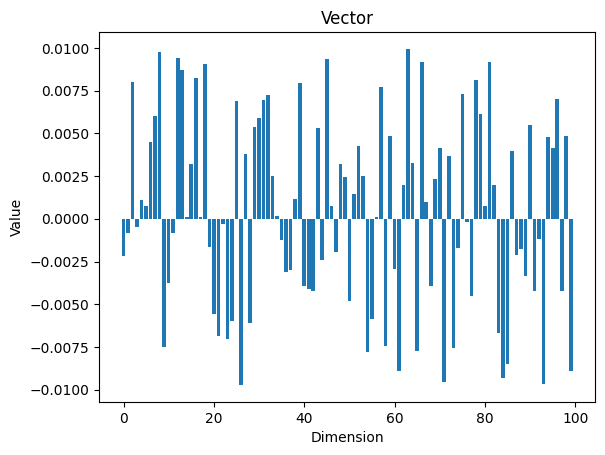

In [6]:
render_vector(vectors_w2vec['avena'])

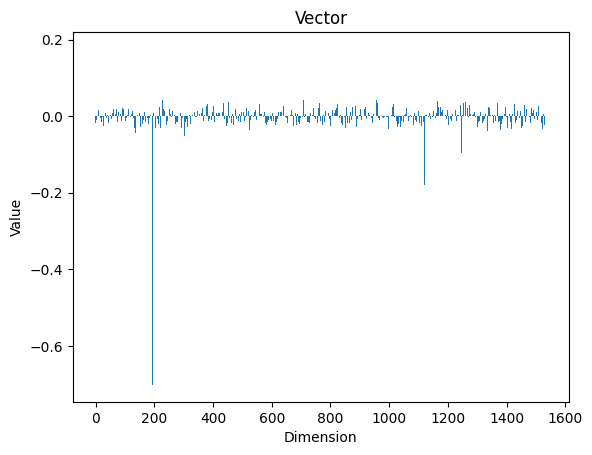

In [7]:
render_vector(vectors_ada2['avena'])

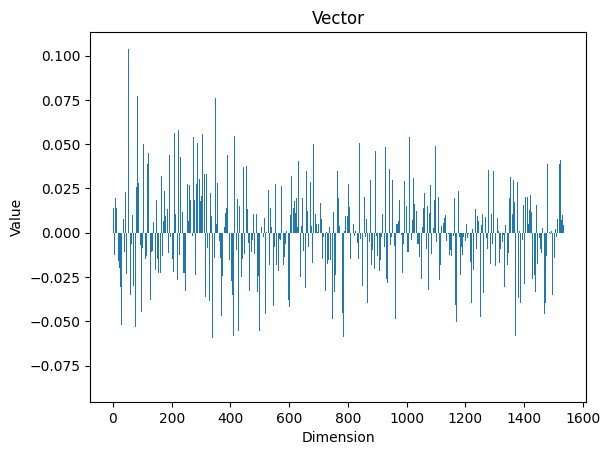

In [8]:
render_vector(vectors_emb3['avena'])

## Visualizaciones con reducción de dimensionalidad

In [9]:
import numpy as np
from sklearn.decomposition import PCA


def perform_pca(vectors: dict):
    """Realiza PCA en los vectores de palabras y devuelve los vectores transformados por PCA"""
    X = np.array(list(vectors.values()))
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    X_pca = {list(vectors.keys())[i]: X_pca[i] for i in range(len(vectors))}
    return X_pca


vectors_wvec_pca = perform_pca(vectors_w2vec)
vectors_ada2_pca = perform_pca(vectors_ada2)
vectors_emb3_pca = perform_pca(vectors_emb3)

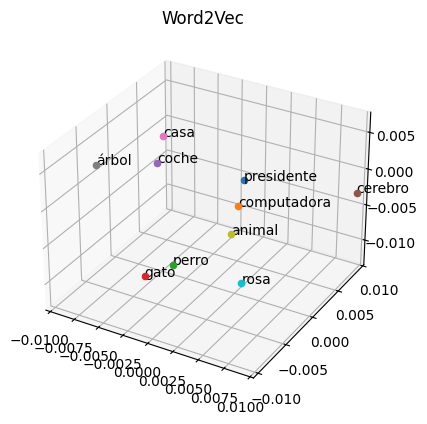

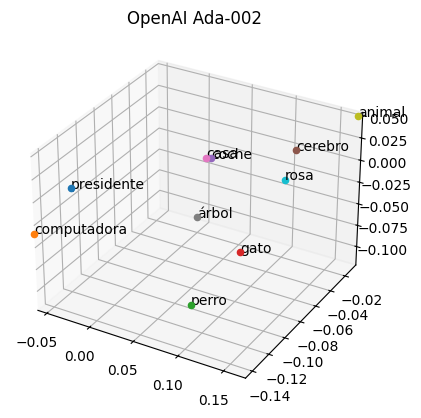

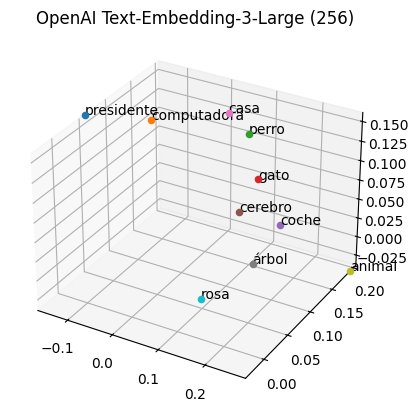

In [ ]:
def render_vectors_3d(vectors: dict, title: str):
    """Renderiza vectores 3D (key: [,,,]) en un gráfico 3D"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Grafica los vectores como puntos
    for key, vector in vectors.items():
        ax.scatter(vector[0], vector[1], vector[2])
        ax.text(vector[0], vector[1], vector[2], key)

    # calular el max y min valor para cada dimension
    min_x = min(v[0] for v in vectors.values())
    max_x = max(v[0] for v in vectors.values())
    min_y = min(v[1] for v in vectors.values())
    max_y = max(v[1] for v in vectors.values())
    min_z = min(v[2] for v in vectors.values())
    max_z = max(v[2] for v in vectors.values())
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.set_zlim([min_z, max_z])
    ax.set_title(title)
    plt.show()


# obten un subset de vectores para plotting
words = ['presidente', 'computadora', 'perro', 'gato', 'coche', 'cerebro', 'casa', 'árbol', 'animal', 'rosa']
word_pca_vectors_wvec = {word: vectors_wvec_pca[word] for word in words}
word_pca_vectors_ada2 = {word: vectors_ada2_pca[word] for word in words}
word_pca_vectors_emb3 = {word: vectors_emb3_pca[word] for word in words}

# grafica los vectores
render_vectors_3d(word_pca_vectors_wvec, 'Word2Vec')
render_vectors_3d(word_pca_vectors_ada2, 'OpenAI Ada-002')
render_vectors_3d(word_pca_vectors_emb3, 'OpenAI Text-Embedding-3-Large (256)')

In [11]:
import pandas as pd

def cosine_similarity(v1, v2):
    """Calcula la similitud del coseno entre dos vectores"""
    dot_product = sum([a * b for a, b in zip(v1, v2)])
    magnitude = (sum([a**2 for a in v1]) * sum([a**2 for a in v2])) ** 0.5
    return dot_product / magnitude

def most_similar(word: str, vectors: dict) -> list[list]:
    """Devuelve las 10 palabras más similares y sus similitudes respecto a la palabra dada"""
    word_vector = vectors[word]
    similarities = {w: cosine_similarity(word_vector, vector) for w, vector in vectors.items()}
    most_similar_words = sorted(similarities, key=similarities.get, reverse=True)
    return pd.DataFrame([(word, similarities[word]) for word in most_similar_words[:10]], columns=['word', 'similarity'])

word = 'perro'
most_similar(word, vectors_w2vec)

,word,similarity
0,perro,1.000000
1,abdómenes,0.299840
2,niño,0.297257
3,mañana,0.290922
4,aeropuerto,0.282170
5,kilo,0.277386
6,presidentes,0.270348
7,culo,0.267954
8,ministro,0.259748
9,esposas,0.254077


In [12]:
most_similar(word, vectors_ada2)

,word,similarity
0,perro,1.000000
1,perros,0.958035
2,gato,0.893870
3,animales,0.885110
4,cerdo,0.880570
5,pájaro,0.880153
6,gatos,0.877150
7,cerdos,0.876196
8,humano,0.876163
9,caballo,0.870435


In [13]:
most_similar(word, vectors_emb3)

,word,similarity
0,perro,1.000000
1,perros,0.865560
2,gato,0.501331
3,animales,0.500569
4,bichos,0.492801
5,poroto,0.480994
6,peras,0.480465
7,ciervo,0.480007
8,pera,0.473874
9,criatura,0.467171


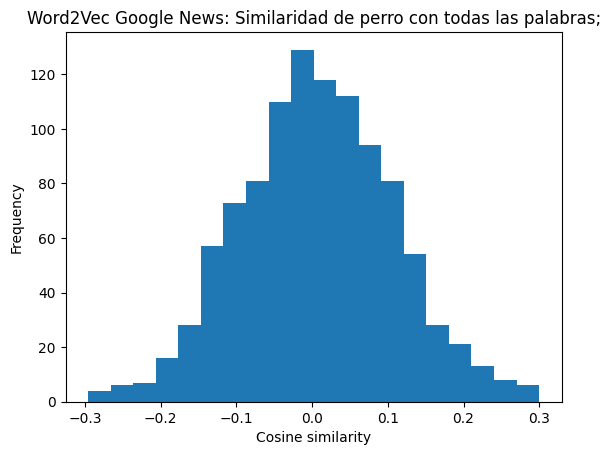

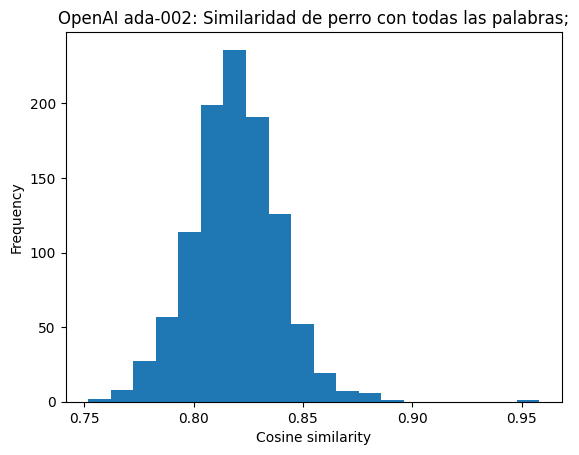

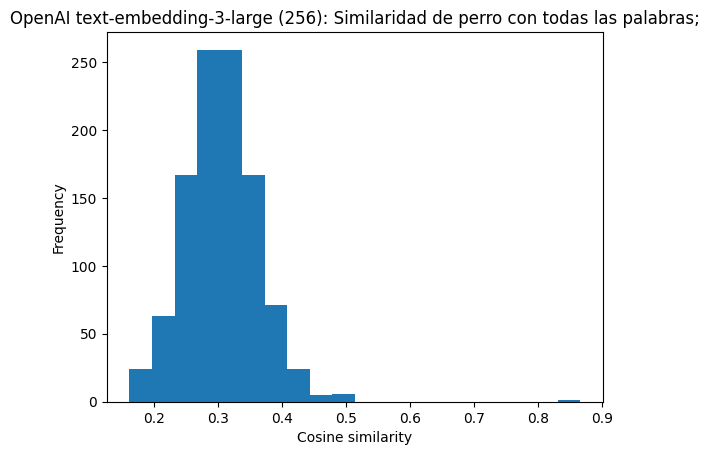

In [14]:
def cosine_similarity_histogram(word: str, vectors: dict, model_name: str):
    """Grafica un histograma de las similitudes del coseno de la palabra con todas las demás palabras"""
    word_vector = vectors[word]
    similarities = [cosine_similarity(word_vector, vectors[w]) for w in vectors if w != word]
    plt.hist(similarities, bins=20)
    plt.xlabel('Cosine similarity')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}: Similaridad de {word} con todas las palabras;')
    plt.show()

cosine_similarity_histogram('perro', vectors_w2vec, 'Word2Vec Google News')
cosine_similarity_histogram('perro', vectors_ada2, 'OpenAI ada-002')
cosine_similarity_histogram('perro', vectors_emb3, 'OpenAI text-embedding-3-large (256)')

## Explore multi-word vectors

In [15]:
import json

with open('embeddings/peliculas_text-embedding-3-small-1536.json') as f:
    movies = json.load(f)

In [ ]:
# Encuentra las 10 películas más similares a una película objetivo
target_movie = movies['101 Dálmatas']

# Calcula la similitud del coseno entre la película objetivo y todas las demás películas
similarities = [cosine_similarity(target_movie, movie) for movie in movies.values()]

most_similar = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[1:11]

similar_movies = [(list(movies.keys())[i], round(similarities[i], 3)) for i in most_similar]
pd.DataFrame(similar_movies, columns=['película', 'similaridad'])

,movie,similarity
0,Los Aristogatos,0.283
1,"Basil, el ratón superdetective",0.283
2,La Bella Durmiente,0.276
3,Los Rescatadores,0.247
4,Tarzán,0.234
5,Dinosaurio,0.234
6,Dumbo,0.230
7,Los Rescatadores en Cangurolandia,0.208
8,Aladdín,0.203
9,Saludos amigos,0.200


In [ ]:
# encuentra las 10 menos similares
least_similar = sorted(range(len(similarities)), key=lambda i: similarities[i])[1:11]
similar_movies = [(list(movies.keys())[i], round(similarities[i], 3)) for i in least_similar]
pd.DataFrame(similar_movies, columns=['película', 'similaridad'])

,movie,similarity
0,Alicia en el país de las maravillas,0.098
1,Winnie the Pooh,0.118
2,Robin Hood,0.118
3,Zafarrancho en el rancho,0.122
4,Lo mejor de Winnie the Pooh,0.124
5,¡Rompe Ralph!,0.128
6,Mary Poppins,0.130
7,Atlantis: El imperio perdido,0.133
8,Tiana y el Sapo,0.133
9,Peter Pan,0.134


## Recursos

* [Embedding projector](https://projector.tensorflow.org/)
* [Why are Cosine Similarities of Text embeddings almost always positive?](https://vaibhavgarg1982.medium.com/why-are-cosine-similarities-of-text-embeddings-almost-always-positive-6bd31eaee4d5)
* [Expected Angular Differences in Embedding Random Text?](https://community.openai.com/t/expected-angular-differences-in-embedding-random-text/28577)
* [Embeddings: What they are and why they matter](https://simonwillison.net/2023/Oct/23/embeddings/)
